In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/Subramanian R/Documents/Python/Machine Learning/Data Science Assignment/melb_data.csv")

In [3]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname','Postcode']

for colname in obj_cats:
    data[colname] = data[colname].astype('category')  


In [6]:
data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         13580 non-null  category
 1   Address        13580 non-null  category
 2   Rooms          13580 non-null  int64   
 3   Type           13580 non-null  category
 4   Price          13580 non-null  float64 
 5   Method         13580 non-null  category
 6   SellerG        13580 non-null  category
 7   Date           13580 non-null  object  
 8   Distance       13580 non-null  float64 
 9   Postcode       13580 non-null  category
 10  Bedroom2       13580 non-null  float64 
 11  Bathroom       13580 non-null  float64 
 12  Car            13518 non-null  float64 
 13  Landsize       13580 non-null  float64 
 14  BuildingArea   7130 non-null   float64 
 15  YearBuilt      8205 non-null   float64 
 16  CouncilArea    12211 non-null  category
 17  Lattitude      13580 non-null  

In [8]:
data["Date"] = pd.to_datetime(data["Date"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  category      
 1   Address        13580 non-null  category      
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  category      
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  category      
 6   SellerG        13580 non-null  category      
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  category      
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

In [10]:
data = data.drop(["Bedroom2"],1)


In [11]:
data['Age'] = 2018 - data['YearBuilt']
data['Age']

0          NaN
1        118.0
2        118.0
3          NaN
4          4.0
         ...  
13575     37.0
13576     23.0
13577     21.0
13578     98.0
13579     98.0
Name: Age, Length: 13580, dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  category      
 1   Address        13580 non-null  category      
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  category      
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  category      
 6   SellerG        13580 non-null  category      
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  category      
 10  Bathroom       13580 non-null  float64       
 11  Car            13518 non-null  float64       
 12  Landsize       13580 non-null  float64       
 13  BuildingArea   7130 non-null   float64       
 14  YearBuilt      8205 non-null   float64       
 15  CouncilArea    1221

In [13]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Age              5375
dtype: int64

In [14]:
(data.isnull().sum()/len(data))*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
Age              39.580265
dtype: float64

In [15]:
data = data.dropna()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         6196 non-null   category      
 1   Address        6196 non-null   category      
 2   Rooms          6196 non-null   int64         
 3   Type           6196 non-null   category      
 4   Price          6196 non-null   float64       
 5   Method         6196 non-null   category      
 6   SellerG        6196 non-null   category      
 7   Date           6196 non-null   datetime64[ns]
 8   Distance       6196 non-null   float64       
 9   Postcode       6196 non-null   category      
 10  Bathroom       6196 non-null   float64       
 11  Car            6196 non-null   float64       
 12  Landsize       6196 non-null   float64       
 13  BuildingArea   6196 non-null   float64       
 14  YearBuilt      6196 non-null   float64       
 15  CouncilArea    6196 

In [17]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Age              0
dtype: int64

In [18]:
data['Regionname'].unique()

['Northern Metropolitan', 'Western Metropolitan', 'Southern Metropolitan', 'Eastern Metropolitan', 'South-Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria', 'Western Victoria']
Categories (8, object): ['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']

In [19]:
all_regions = data['Price'].values

In [20]:
all_regions

array([1035000., 1465000., 1600000., ...,  385000.,  560000., 2450000.])

In [21]:
northern_metropolitan = data['Price'].loc[data['Regionname'] == 'Northern Metropolitan'].values
southern_metropolitan = data['Price'].loc[data['Regionname'] == 'Southern Metropolitan'].values
eastern_metropolitan = data['Price'].loc[data['Regionname'] == 'Eastern Metropolitan'].values
western_metropolitan = data['Price'].loc[data['Regionname'] == 'Western Metropolitan'].values
southeastern_metropolitan = data['Price'].loc[data['Regionname'] == 'South-Eastern Metropolitan'].values
northern_victoria = data['Price'].loc[data['Regionname'] == 'Northern Victoria'].values
eastern_victoria = data['Price'].loc[data['Regionname'] == 'Eastern Victoria'].values
western_victoria = data['Price'].loc[data['Regionname'] == 'Western Victoria'].values

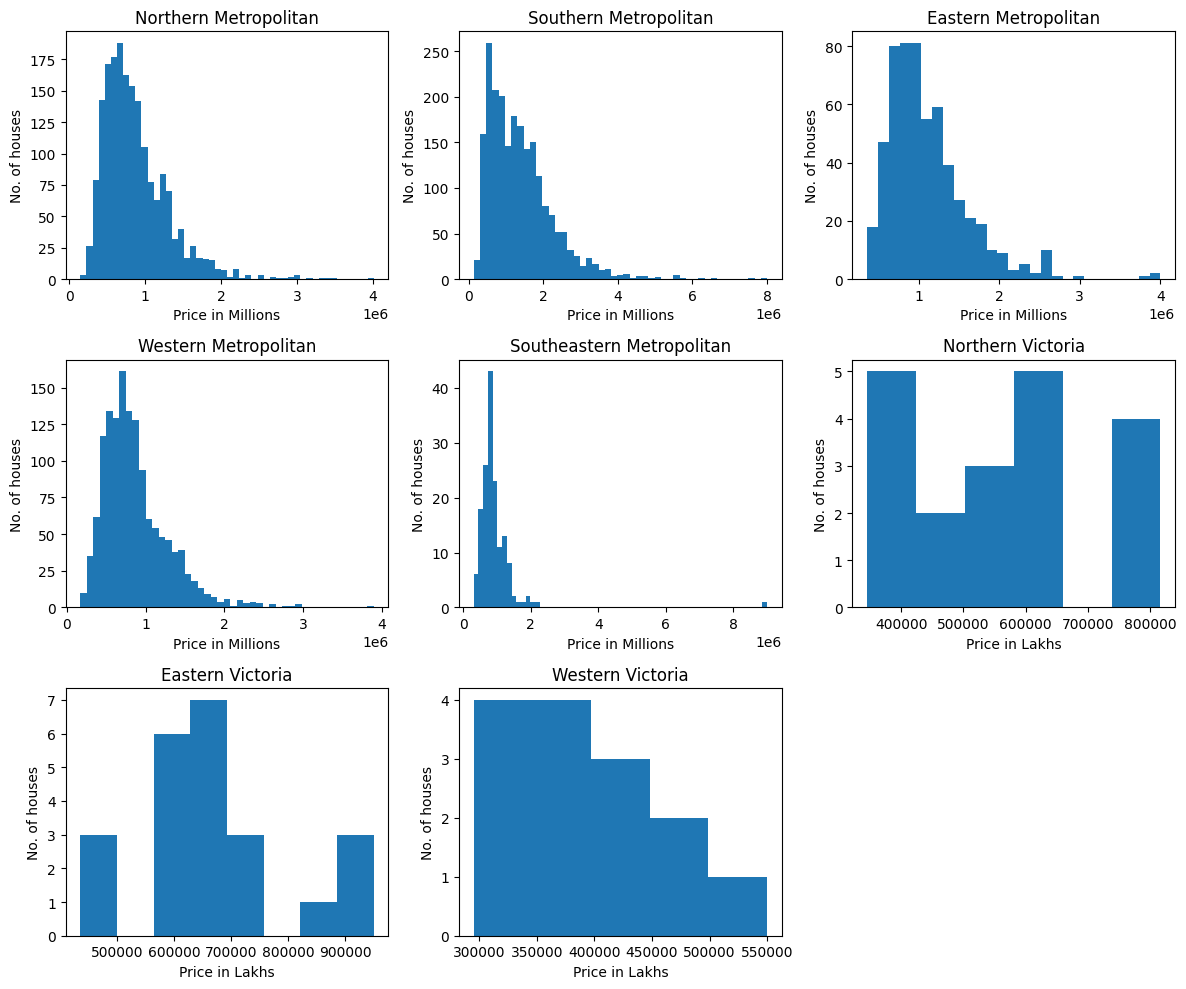

In [22]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

axs[0, 0].hist(northern_metropolitan, bins='auto')
axs[0, 0].set_xlabel("Price in Millions")
axs[0, 0].set_ylabel("No. of houses")
axs[0, 0].set_title("Northern Metropolitan")

axs[0, 1].hist(southern_metropolitan, bins='auto')
axs[0, 1].set_xlabel("Price in Millions")
axs[0, 1].set_ylabel("No. of houses")
axs[0, 1].set_title("Southern Metropolitan")

axs[0, 2].hist(eastern_metropolitan, bins='auto')
axs[0, 2].set_xlabel("Price in Millions")
axs[0, 2].set_ylabel("No. of houses")
axs[0, 2].set_title("Eastern Metropolitan")

axs[1, 0].hist(western_metropolitan, bins='auto')
axs[1, 0].set_xlabel("Price in Millions")
axs[1, 0].set_ylabel("No. of houses")
axs[1, 0].set_title("Western Metropolitan")

axs[1, 1].hist(southeastern_metropolitan, bins='auto')
axs[1, 1].set_xlabel("Price in Millions")
axs[1, 1].set_ylabel("No. of houses")
axs[1, 1].set_title("Southeastern Metropolitan")

axs[1, 2].hist(northern_victoria, bins='auto')
axs[1, 2].set_xlabel("Price in Lakhs")
axs[1, 2].set_ylabel("No. of houses")
axs[1, 2].set_title("Northern Victoria")

axs[2, 0].hist(eastern_victoria, bins='auto')
axs[2, 0].set_xlabel("Price in Lakhs")
axs[2, 0].set_ylabel("No. of houses")
axs[2, 0].set_title("Eastern Victoria")

axs[2, 1].hist(western_victoria, bins='auto')
axs[2, 1].set_xlabel("Price in Lakhs")
axs[2, 1].set_ylabel("No. of houses")
axs[2, 1].set_title("Western Victoria")


fig.delaxes(axs[2, 2])

fig.tight_layout()

# display the figure
plt.show()


In [23]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")

In [24]:
data["Month"] = data["Date"].dt.month
data["year"] = data["Date"].dt.year

In [25]:
tot_price = data["Price"].sum()

In [26]:
tot_price

6622459540.0

In [27]:
def per_month_sales(data,month,sales = tot_price):
    month_sales = data['Price'].loc[data['Month'] == month].sum()/sales
    return month_sales

In [28]:
january_sales = per_month_sales(data, 1)
february_sales = per_month_sales(data, 2)
march_sales = per_month_sales(data, 3)
april_sales = per_month_sales(data, 4)
may_sales = per_month_sales(data, 5)
june_sales = per_month_sales(data, 6)
july_sales = per_month_sales(data, 7)
august_sales = per_month_sales(data, 8)
september_sales = per_month_sales(data, 9)
october_sales = per_month_sales(data, 10)
november_sales = per_month_sales(data, 11)
december_sales = per_month_sales(data, 12)


In [29]:
month_total_sales = [january_sales, february_sales, march_sales, april_sales,may_sales, june_sales, july_sales, august_sales, september_sales, october_sales, november_sales, december_sales]

labels = ['January', 'February', 'March', 'April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
colors = ['#ffb4da', '#b4b4ff', '#daffb4', '#fbab60', '#fa8072', '#FA6006','#FDB603', '#639702', '#dacde6', '#faec72', '#9ab973', '#87cefa']



([<matplotlib.patches.Wedge at 0x1c4cdaaa050>,
 [Text(1.0988065638458604, 0.051226314031492914, 'January'),
  Text(1.0792244034599139, 0.2127784927491342, 'February'),
  Text(0.8878907955286601, 0.6493457747729503, 'March'),
  Text(0.3072758751759974, 1.056210933731906, 'April'),
  Text(-0.46266016521573455, 0.997970726786387, 'May'),
  Text(-1.0137759941907811, 0.42691712732390263, 'June'),
  Text(-1.0252122087431665, -0.3986727066704692, 'July'),
  Text(-0.4491730199453301, -1.004113339296512, 'August'),
  Text(0.06693488599821548, -1.097961620930534, 'September'),
  Text(0.48292204381081155, -0.9883249969527174, 'October'),
  Text(0.8962832199978206, -0.6377118389604655, 'November'),
  Text(1.0797549627273595, -0.2100695610164373, 'December')],
 [Text(0.5993490348250147, 0.02794162583535977, '1.5%'),
  Text(0.5886678564326802, 0.11606099604498228, '3.2%'),
  Text(0.48430407028836003, 0.3541886044216092, '10.7%'),
  Text(0.1676050228232713, 0.5761150547628578, '10.2%'),
  Text(-0.252

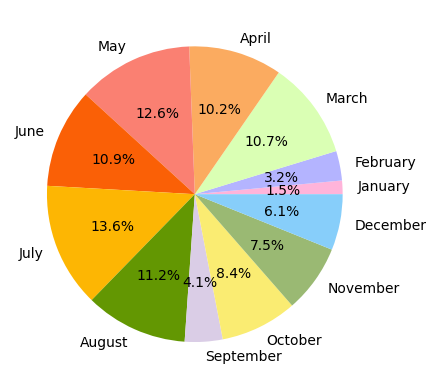

In [30]:
plt.pie(month_total_sales,labels = labels,colors=colors,autopct='%1.1f%%')

In [31]:
data['YearBuilt'].max()

2018.0

In [32]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,6196.0,2.931407e+00,0.971079,1.00000,2.000000,3.00000,4.000000e+00,8.000000e+00
Price,6196.0,1.068828e+06,675156.427502,131000.00000,620000.000000,880000.00000,1.325000e+06,9.000000e+06
Distance,6196.0,9.751097e+00,5.612065,0.00000,5.900000,9.00000,1.240000e+01,4.740000e+01
Bathroom,6196.0,1.576340e+00,0.711362,1.00000,1.000000,1.00000,2.000000e+00,8.000000e+00
Car,6196.0,1.573596e+00,0.929947,0.00000,1.000000,1.00000,2.000000e+00,1.000000e+01
Landsize,6196.0,4.710069e+02,897.449881,0.00000,152.000000,373.00000,6.280000e+02,3.700000e+04
BuildingArea,6196.0,1.415686e+02,90.834824,0.00000,91.000000,124.00000,1.700000e+02,3.112000e+03
YearBuilt,6196.0,1.964082e+03,38.105673,1196.00000,1940.000000,1970.00000,2.000000e+03,2.018000e+03
Lattitude,6196.0,-3.780790e+01,0.075850,-38.16492,-37.855438,-37.80225,-3.775820e+01,-3.745709e+01
Longtitude,6196.0,1.449902e+02,0.099165,144.54237,144.926198,144.99580,1.450527e+02,1.455264e+02


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         6196 non-null   category      
 1   Address        6196 non-null   category      
 2   Rooms          6196 non-null   int64         
 3   Type           6196 non-null   category      
 4   Price          6196 non-null   float64       
 5   Method         6196 non-null   category      
 6   SellerG        6196 non-null   category      
 7   Date           6196 non-null   datetime64[ns]
 8   Distance       6196 non-null   float64       
 9   Postcode       6196 non-null   category      
 10  Bathroom       6196 non-null   float64       
 11  Car            6196 non-null   float64       
 12  Landsize       6196 non-null   float64       
 13  BuildingArea   6196 non-null   float64       
 14  YearBuilt      6196 non-null   float64       
 15  CouncilArea    6196 

In [34]:
data['Type'].unique()

['h', 'u', 't']
Categories (3, object): ['h', 't', 'u']

In [35]:
data['year'].unique()

array([2016, 2017], dtype=int64)

In [36]:
data['year']

1        2016
2        2017
4        2016
6        2016
7        2016
         ... 
12205    2017
12206    2017
12207    2017
12209    2017
12212    2017
Name: year, Length: 6196, dtype: int64

In [37]:
data['Rooms'].unique()

array([2, 3, 4, 1, 6, 5, 8, 7], dtype=int64)

In [38]:
def per_room_sales(data,room,sales = tot_price):
    room_sales = data['Price'].loc[data['Rooms'] == room].sum()/sales
    return room_sales

In [39]:
one_room = per_room_sales(data,1)
two_room = per_room_sales(data,2)
three_room = per_room_sales(data,3)
four_room = per_room_sales(data,4)
five_room = per_room_sales(data,5)
six_room = per_room_sales(data,6)
seven_room = per_room_sales(data,7)
eight_room = per_room_sales(data,8)

In [40]:
room_tot_sales = [one_room,two_room,three_room,four_room,five_room,six_room,seven_room,eight_room]

In [41]:
labels = ['One room', 'Two room', 'Three room', 'Four room','Five room', 'Six room', 'Seven room', 'Eight room']
colors = ['#ffb4da', '#b4b4ff', '#daffb4', '#fbab60', '#fa8072', '#FA6006','#FDB603', '#639702']

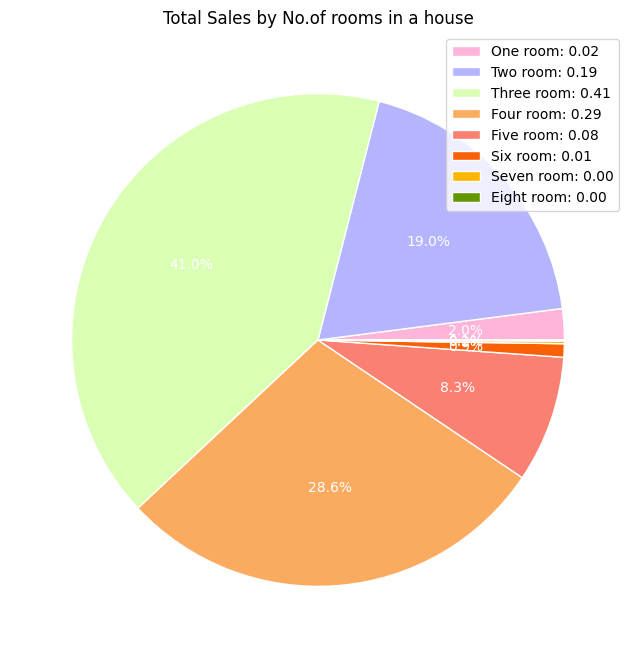

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
_, _, autotexts = ax.pie(room_tot_sales,colors=colors,wedgeprops={"linewidth": 1, "edgecolor": "white"},autopct="%1.1f%%",)
ax.set_title("Total Sales by No.of rooms in a house")
ax.legend(labels=[f"{label}: {sales:,.2f}" for label, sales in zip(labels, room_tot_sales)])
for autotext in autotexts:
    autotext.set_color("white")
plt.show()


In [43]:
def month_year_sales(data, month, year):
    double_conditional = data['Price'].loc[(data['Month'] == month) & (data['year'] == year)].sum()
    return double_conditional

In [44]:
january_2016 = month_year_sales(data, 1, 2016)
february_2016 = month_year_sales(data, 2, 2016)
march_2016 = month_year_sales(data, 3, 2016)
april_2016 = month_year_sales(data, 4, 2016)
may_2016 = month_year_sales(data, 5, 2016)
june_2016 = month_year_sales(data, 6, 2016)
july_2016 = month_year_sales(data, 7, 2016)
august_2016 = month_year_sales(data, 8, 2016)
september_2016 = month_year_sales(data, 9, 2016)
october_2016 = month_year_sales(data, 10, 2016)
november_2016 = month_year_sales(data, 11, 2016)
december_2016 = month_year_sales(data, 12, 2016)

In [45]:
january_2017 = month_year_sales(data, 1, 2017)
february_2017 = month_year_sales(data, 2, 2017)
march_2017 = month_year_sales(data, 3, 2017)
april_2017 = month_year_sales(data, 4, 2017)
may_2017 = month_year_sales(data, 5, 2017)
june_2017 = month_year_sales(data, 6, 2017)
july_2017 = month_year_sales(data, 7, 2017)
august_2017 = month_year_sales(data, 8, 2017)
september_2017 = month_year_sales(data, 9, 2017)
october_2017 = month_year_sales(data, 10, 2017)
november_2017 = month_year_sales(data, 11, 2017)
december_2017 = month_year_sales(data, 12, 2017)

In [46]:
lst_2016 = [january_2016, february_2016, march_2016, april_2016,may_2016, june_2016, july_2016, august_2016,september_2016, october_2016, november_2016, december_2016]

lst_2017 = [january_2017, february_2017, march_2017, april_2017,may_2017, june_2017, july_2017, august_2017,september_2017, october_2017, november_2017, december_2017]
lst_2016

[0.0,
 0.0,
 347303750.0,
 342349700.0,
 365670850.0,
 354290090.0,
 493900997.0,
 453038649.0,
 273703400.0,
 556045698.0,
 442122905.0,
 213405499.0]

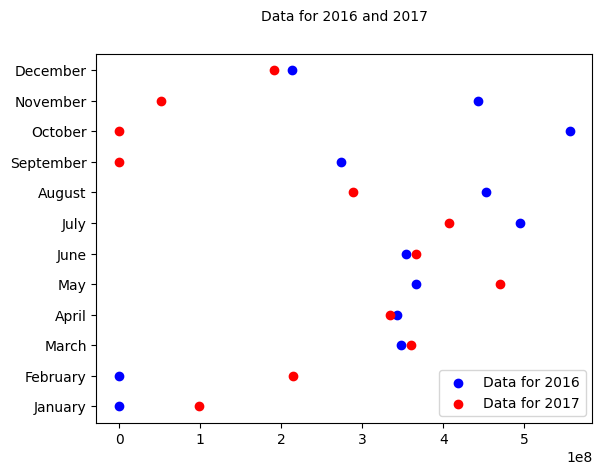

In [47]:
labels = ['January', 'February', 'March', 'April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
colors = ['blue', 'red']
for i, year_data in enumerate([lst_2016, lst_2017]):
    plt.scatter(year_data,labels,color=colors[i], label='Data for 201{}'.format(i+6))
plt.text(0.5, 1.1, 'Data for 2016 and 2017', ha='center', va='center', transform=plt.gca().transAxes)
plt.legend()

In [62]:
def type_sales(data, type1):
    type_prices = []
    for samp in (data['Price'].loc[(data['Type'] == type1)]):
        type_prices.append(samp)
    return type_prices

In [63]:
h_price = type_sales(data,'h')
u_price = type_sales(data,'u')
t_price = type_sales(data,'t')

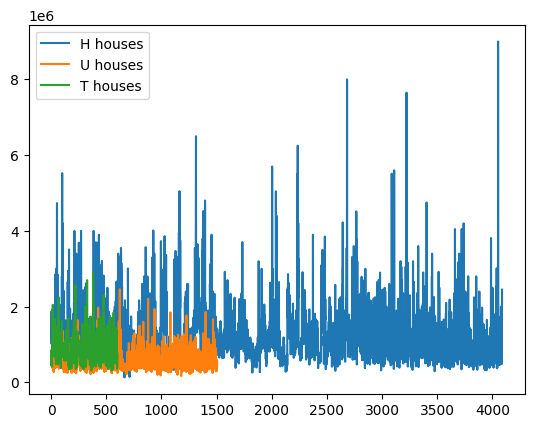

In [67]:
fig, ax = plt.subplots()

# Plot the data
ax.plot(h_price, label='H houses')
ax.plot(u_price, label='U houses')
ax.plot(t_price, label='T houses')
ax.legend()

In [68]:
data['SellerG'].unique()

['Biggin', 'Nelson', 'Jellis', 'LITTLE', 'Kay', ..., 'Kaye', 'Bowman', 'Langwell', 'Weston', 'Leeburn']
Length: 203
Categories (268, object): ['@Realty', 'ASL', 'Abercromby's', 'Ace', ..., 'iOne', 'iProperty', 'iSell', 'iTRAK']